# Diabetes Study

## Importing dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes2.csv')

### Viewing the Dataset

In [3]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1142956,1,78,41,33,311,50.796392,0.420804,24,0
1,1823377,0,116,92,16,184,18.603630,0.131156,22,0
2,1916381,8,171,42,29,160,35.482247,0.082671,22,1
3,1247480,3,108,63,45,297,49.375169,0.100979,46,1
4,1516947,8,153,99,15,41,35.062139,0.116191,22,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               5000 non-null   int64  
 1   Pregnancies             5000 non-null   int64  
 2   PlasmaGlucose           5000 non-null   int64  
 3   DiastolicBloodPressure  5000 non-null   int64  
 4   TricepsThickness        5000 non-null   int64  
 5   SerumInsulin            5000 non-null   int64  
 6   BMI                     5000 non-null   float64
 7   DiabetesPedigree        5000 non-null   float64
 8   Age                     5000 non-null   int64  
 9   Diabetic                5000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 390.8 KB


___
## Preprocessing

### Checking for **NULL** values

In [5]:
print(df.isnull().sum())

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64


### Correlation Matrix for analysing variable significance

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

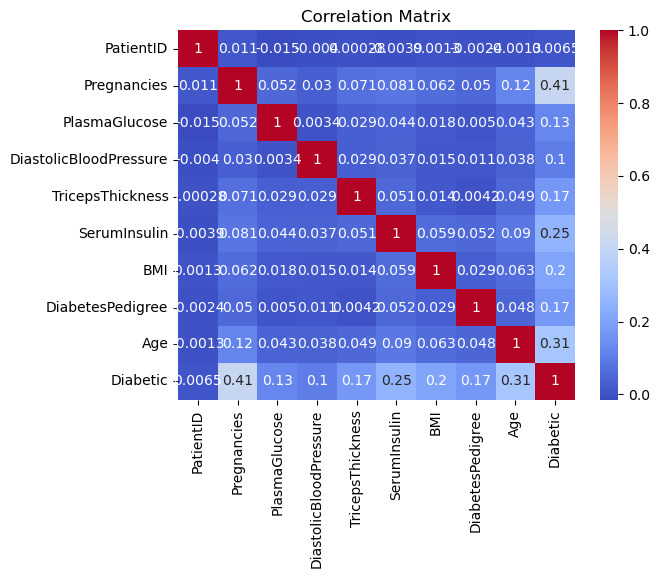

In [7]:
corr = df.corr(numeric_only=True)  # Pearson by default
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

It can be obeserved that none of the variables are much correlated to be ignored from the dataset. Hence for this project I will be including
all of the variables.

In [8]:
diabetic = df['Diabetic']

In [9]:
df.drop(['Diabetic','PatientID'], axis=1, inplace=True)

In [10]:
df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,1,78,41,33,311,50.796392,0.420804,24
1,0,116,92,16,184,18.603630,0.131156,22
2,8,171,42,29,160,35.482247,0.082671,22
3,3,108,63,45,297,49.375169,0.100979,46
4,8,153,99,15,41,35.062139,0.116191,22


### Outlier Detection

In [11]:
import matplotlib.pyplot as plt

C:\Users\16479\AppData\Local\Temp\ipykernel_24792\2292152641.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.select_dtypes(include='number').values, labels = labels, patch_artist=True)


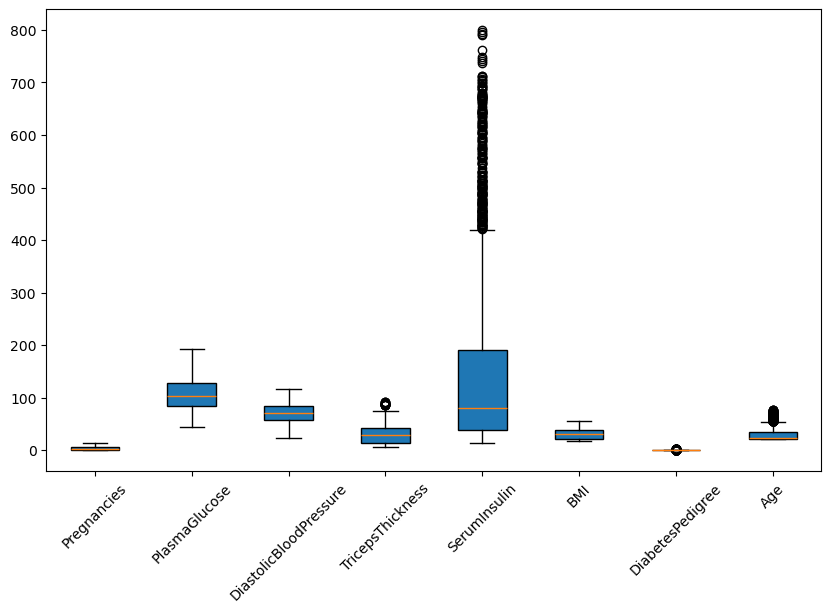

In [12]:
plt.figure(figsize=(10, 6))  # Optional: adjust figure size
labels = df.columns
plt.boxplot(df.select_dtypes(include='number').values, labels = labels, patch_artist=True)
plt.xticks(rotation=45)
plt.show()

#### Removing Outliers

In [13]:
def remove_outliers(df):
    df_clean = df.copy()
    numeric_cols = df_clean.select_dtypes(include='number').columns
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        index = df_clean.loc[df[col] < lower_bound,].index
        diabetic.drop(index, inplace=True)
        index = df_clean.loc[df[col] > upper_bound,].index
        diabetic.drop(index, inplace=True)
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

In [14]:
df_clean = remove_outliers(df)

C:\Users\16479\AppData\Local\Temp\ipykernel_24792\1225695246.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_clean, labels = labels, patch_artist=True)


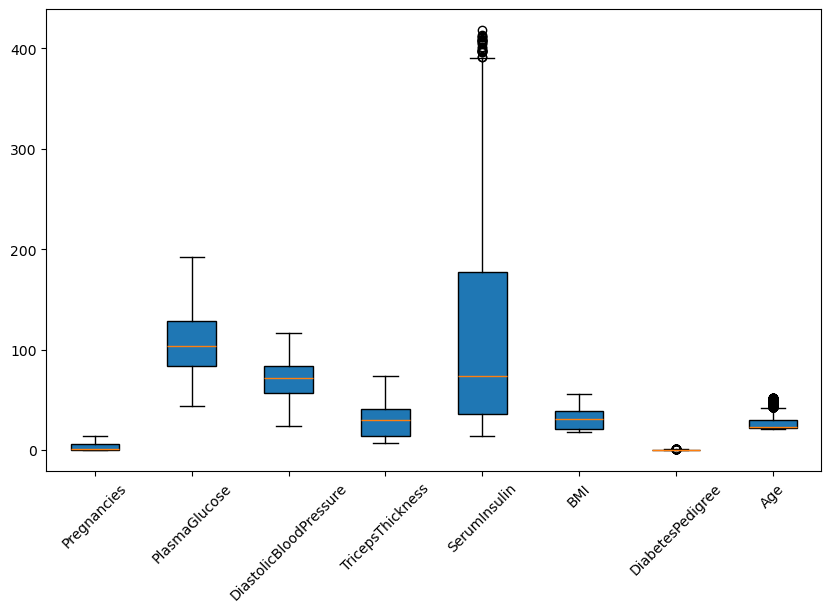

In [15]:
plt.figure(figsize=(10, 6))  # Optional: adjust figure size
labels = df_clean.columns
plt.boxplot(df_clean, labels = labels, patch_artist=True)
plt.xticks(rotation=45)
plt.show()

### Scaling the features

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaled_data = scaler.fit_transform(df_clean)

In [19]:
print(scaled_data)

[[-0.60251028 -0.91537403 -1.77571268 ...  2.02464661  0.23232569
  -0.4032173 ]
 [-0.90217522  0.26829422  1.24496992 ... -1.28196714 -0.7500241
  -0.64801131]
 [ 1.49514428  1.98149826 -1.71648361 ...  0.45168554 -0.91446428
  -0.64801131]
 ...
 [-0.30284534 -1.07111985 -0.29498592 ... -0.09778884  1.72951584
   1.31034075]
 [-0.90217522 -0.44813656  1.06728271 ... -1.27302563  0.25350677
  -0.4032173 ]
 [-0.90217522  0.76668085  1.60034434 ... -1.15994257 -0.16972933
  -0.5256143 ]]


In [20]:
scaled_df = pd.DataFrame(scaled_data, columns=df_clean.columns)
scaled_df.head(10)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,-0.602510,-0.915374,-1.775713,0.335484,2.103540,2.024647,0.232326,-0.403217
1,-0.902175,0.268294,1.244970,-0.857202,0.752336,-1.281967,-0.750024,-0.648011
2,1.495144,1.981498,-1.716484,0.054852,0.496990,0.451686,-0.914464,-0.648011
3,-0.003180,0.019101,-0.472673,1.177380,1.954588,1.878669,-0.852372,2.289517
4,1.495144,1.420813,1.659573,-0.927360,-0.769098,0.408535,-0.800779,-0.648011
5,-0.902175,-0.821927,1.126512,-0.787044,-0.801016,1.086018,0.428509,-0.770408
6,-0.902175,-0.790777,-1.124193,1.177380,-0.758459,0.993527,-0.915548,-0.158423
7,-0.003180,-0.136645,-1.005735,1.317696,-0.205210,2.471760,-0.121510,-0.770408
8,0.895814,1.078172,-0.472673,-1.278150,1.603488,1.435643,-0.854850,-0.770408
9,-0.602510,0.517488,0.356534,0.405642,1.156633,0.656457,-0.794541,-0.403217


### Splitting Data into Training and Testing datasets

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, diabetic, test_size=0.2, random_state=42)

___
## Model Training and Evaluation

### Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7747641509433962
Confusion Matrix:
 [[556  53]
 [138 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       609
           1       0.66      0.42      0.51       239

    accuracy                           0.77       848
   macro avg       0.73      0.67      0.68       848
weighted avg       0.76      0.77      0.76       848



In [26]:
import optuna
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

def objective(trial):

    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])


    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()
    if penalty == 'l2' and solver not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()

    model = make_pipeline(
        StandardScaler(),
        LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
    )

   
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


print("Best hyperparameters:", study.best_trial.params)
print("Best accuracy (CV):", study.best_trial.value)


best_params = study.best_trial.params
final_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        C=best_params['C'],
        penalty=best_params['penalty'],
        solver=best_params['solver'],
        max_iter=1000
    )
)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

[I 2025-04-07 23:53:50,335] A new study created in memory with name: no-name-625b36a0-61b0-494d-98ad-1217cd1fd9f3
C:\Users\16479\AppData\Local\Temp\ipykernel_24792\1834290506.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e2)
[I 2025-04-07 23:53:50,368] Trial 0 finished with value: 0.7329010648142114 and parameters: {'C': 0.000637516203531907, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.7329010648142114.
C:\Users\16479\AppData\Local\Temp\ipykernel_24792\1834290506.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e2)
[I 2025-04-07 23:53:50,397] Trial 1 fin

Best hyperparameters: {'C': 0.1531327520338699, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy (CV): 0.8077838744292535
Accuracy: 0.7735849056603774
Confusion Matrix:
 [[555  54]
 [138 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       609
           1       0.65      0.42      0.51       239

    accuracy                           0.77       848
   macro avg       0.73      0.67      0.68       848
weighted avg       0.76      0.77      0.76       848



## Saving Model as Pickle file

In [27]:
import pickle

model_pkl_file = "diabetes_logistic_regression.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(final_model, file)

### Random Forest Classifier Model

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9174528301886793
Confusion Matrix:
 [[587  22]
 [ 48 191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       609
           1       0.90      0.80      0.85       239

    accuracy                           0.92       848
   macro avg       0.91      0.88      0.89       848
weighted avg       0.92      0.92      0.92       848



In [31]:
from sklearn.pipeline import Pipeline

def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)


    clf = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        ))
    ])

    score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    return score.mean()


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


print("Best trial:")
print(study.best_trial)


best_params = study.best_trial.params
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(**best_params, random_state=42))
])

final_model.fit(X_train, y_train)


y_pred = final_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

[I 2025-04-07 23:54:13,971] A new study created in memory with name: no-name-1aaa9041-9d78-4df9-8ec4-2fe4f02b0145
[I 2025-04-07 23:54:15,472] Trial 0 finished with value: 0.9313088395653855 and parameters: {'n_estimators': 118, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9313088395653855.
[I 2025-04-07 23:54:17,913] Trial 1 finished with value: 0.9298352166338665 and parameters: {'n_estimators': 199, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9313088395653855.
[I 2025-04-07 23:54:19,200] Trial 2 finished with value: 0.831074676015831 and parameters: {'n_estimators': 170, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9313088395653855.
[I 2025-04-07 23:54:21,672] Trial 3 finished with value: 0.923644870775607 and parameters: {'n_estimators': 257, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9

Best trial:
FrozenTrial(number=15, state=1, values=[0.9351397378584678], datetime_start=datetime.datetime(2025, 4, 7, 23, 54, 40, 972212), datetime_complete=datetime.datetime(2025, 4, 7, 23, 54, 44, 877739), params={'n_estimators': 281, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'max_depth': IntDistribution(high=20, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=1, step=1)}, trial_id=15, value=None)
Accuracy: 0.9198113207547169
Confusion Matrix:
 [[586  23]
 [ 45 194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       609
           1       0.89      0.81      0.85       239

    accuracy                           0.92       848
   macro

In [32]:
import pickle

model_pkl_file = "diabetes_random_forest.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(final_model, file)